In [1]:
from uk_covid19 import Cov19API
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wdg
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

nation;areaName=England;areaName=Northern Ireland;areaName=Wales;areaName=Scotland

   "date": "date",
    "areaName": "areaName",
    "cases": "newCasesByPublishDate",
    "vaccinationsbydem": "vaccinationsAgeDemographics",

In [2]:
# filters 

sick_vax_filters = [
    'areaType=overview' # note each metric-value pair is inside one string
]

In [3]:
# structure

sick_vax_structure = {
    "date": "date",
    "cumAdmin":"cumAdmissions",
    "occMVBeds": "covidOccupiedMVBeds",
    "cumVax1": "cumPeopleVaccinatedFirstDoseByPublishDate",
    "cumVax2": "cumPeopleVaccinatedSecondDoseByPublishDate",
    "cumVax3": "cumPeopleVaccinatedThirdInjectionByPublishDate",
}

In [4]:
sick_vax_api = Cov19API(filters=sick_vax_filters, structure=sick_vax_structure)

sick_vax_data = sick_vax_api.get_json()
print(sick_vax_data)


{'data': [{'date': '2022-09-11', 'cumAdmin': 993741, 'occMVBeds': None, 'cumVax1': 53813491, 'cumVax2': 50762968, 'cumVax3': None}, {'date': '2022-09-10', 'cumAdmin': 993192, 'occMVBeds': None, 'cumVax1': 53812756, 'cumVax2': 50760564, 'cumVax3': None}, {'date': '2022-09-09', 'cumAdmin': 992735, 'occMVBeds': None, 'cumVax1': 53810757, 'cumVax2': 50754555, 'cumVax3': None}, {'date': '2022-09-08', 'cumAdmin': 992242, 'occMVBeds': None, 'cumVax1': 53809727, 'cumVax2': 50752513, 'cumVax3': None}, {'date': '2022-09-07', 'cumAdmin': 991651, 'occMVBeds': None, 'cumVax1': 53808854, 'cumVax2': 50750722, 'cumVax3': None}, {'date': '2022-09-06', 'cumAdmin': 991035, 'occMVBeds': None, 'cumVax1': 53808189, 'cumVax2': 50749294, 'cumVax3': None}, {'date': '2022-09-05', 'cumAdmin': 990398, 'occMVBeds': None, 'cumVax1': 53807630, 'cumVax2': 50747621, 'cumVax3': None}, {'date': '2022-09-04', 'cumAdmin': 989780, 'occMVBeds': None, 'cumVax1': 53806963, 'cumVax2': 50745901, 'cumVax3': 40373987}, {'date': '

In [5]:
# getting the file


with open("sick_vax.json", "wt") as OUTF:
    json.dump(sick_vax_data, OUTF)

In [6]:
# cleaning the data

with open("sick_vax.json", "rt") as INFILE:
    sick_vax_data = json.load(INFILE)


sick_vax_datalist = sick_vax_data["data"]
print(sick_vax_datalist)


[{'date': '2022-09-11', 'cumAdmin': 993741, 'occMVBeds': None, 'cumVax1': 53813491, 'cumVax2': 50762968, 'cumVax3': None}, {'date': '2022-09-10', 'cumAdmin': 993192, 'occMVBeds': None, 'cumVax1': 53812756, 'cumVax2': 50760564, 'cumVax3': None}, {'date': '2022-09-09', 'cumAdmin': 992735, 'occMVBeds': None, 'cumVax1': 53810757, 'cumVax2': 50754555, 'cumVax3': None}, {'date': '2022-09-08', 'cumAdmin': 992242, 'occMVBeds': None, 'cumVax1': 53809727, 'cumVax2': 50752513, 'cumVax3': None}, {'date': '2022-09-07', 'cumAdmin': 991651, 'occMVBeds': None, 'cumVax1': 53808854, 'cumVax2': 50750722, 'cumVax3': None}, {'date': '2022-09-06', 'cumAdmin': 991035, 'occMVBeds': None, 'cumVax1': 53808189, 'cumVax2': 50749294, 'cumVax3': None}, {'date': '2022-09-05', 'cumAdmin': 990398, 'occMVBeds': None, 'cumVax1': 53807630, 'cumVax2': 50747621, 'cumVax3': None}, {'date': '2022-09-04', 'cumAdmin': 989780, 'occMVBeds': None, 'cumVax1': 53806963, 'cumVax2': 50745901, 'cumVax3': 40373987}, {'date': '2022-09-0

In [7]:
# getting the index based on the dates

sick_vax_dates = [dictionary["date"] for dictionary in sick_vax_datalist]



sick_vax_dates.sort()
#print(sick_vax_dates)


#function to get the panda of a datestring
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")


#getting the start and end dates
sick_vax_startdate = parse_date(sick_vax_dates[0])
sick_vax_enddate = parse_date(sick_vax_dates[-1])
#print (sick_vax_startdate, ' to ', sick_vax_enddate)

sick_vax_index = pd.date_range(sick_vax_startdate, sick_vax_enddate, freq='D')
#print(sick_vax_index)

In [8]:


# getting the data into a dataframe

sick_vax_df = pd.DataFrame(index=sick_vax_index, columns=["cumAdmin", "occMVBeds", "cumVax1", "cumVax2", "cumVax3"])
print(sick_vax_df)

           cumAdmin occMVBeds cumVax1 cumVax2 cumVax3
2020-03-23      NaN       NaN     NaN     NaN     NaN
2020-03-24      NaN       NaN     NaN     NaN     NaN
2020-03-25      NaN       NaN     NaN     NaN     NaN
2020-03-26      NaN       NaN     NaN     NaN     NaN
2020-03-27      NaN       NaN     NaN     NaN     NaN
...             ...       ...     ...     ...     ...
2022-09-07      NaN       NaN     NaN     NaN     NaN
2022-09-08      NaN       NaN     NaN     NaN     NaN
2022-09-09      NaN       NaN     NaN     NaN     NaN
2022-09-10      NaN       NaN     NaN     NaN     NaN
2022-09-11      NaN       NaN     NaN     NaN     NaN

[903 rows x 5 columns]


In [9]:
# filling the data frame

for entry in sick_vax_datalist:

    date = parse_date(entry["date"])

    for column in ["cumAdmin", "occMVBeds", "cumVax1", "cumVax2", "cumVax3"]: 

        if pd.isna(sick_vax_df.loc[date, column]):

            value = float(entry[column]) if entry[column] !=None else 0.0

            sick_vax_df.loc[date, column] = value

sick_vax_df.fillna(0.0, inplace=True)

#print(sick_vax_df)




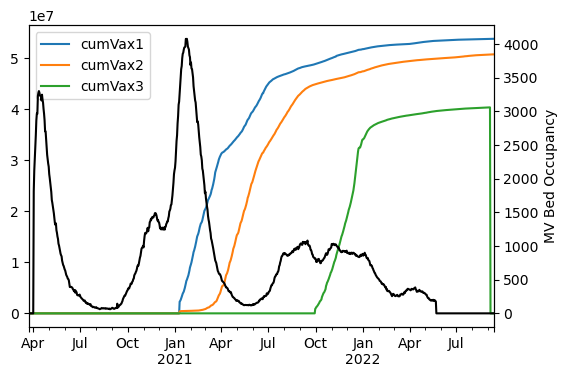

In [18]:
sick_vax_df.plot(y=["cumVax1", "cumVax2", "cumVax3"], use_index=True)
ax = sick_vax_df["occMVBeds"].plot(secondary_y=True, color='k')   # creating a secondary y axis to be able to show the occMVBed ratio # checl here how multiple new y wouldwork!!
ax.set_ylabel('MV Bed Occupancy')

plt.show()

In [11]:
# making this interactive

def access_api(button):
    # API call here:
    sick_vax_api = Cov19API(filters=sick_vax_filters, structure=sick_vax_structure)
    sick_vax_data = sick_vax_api.get_json()
    
    apibutton.icon="check"
    apibutton.disabled=True

   
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # 
)

# register the callback function with the button
apibutton.on_click(access_api)


# display the widgets
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

In [27]:
vaxcols=wdg.SelectMultiple(
    options=['cumVax1', 'cumVax2', 'cumVax3'], # options available
    value=['cumVax1', 'cumVax2', "cumVax3"], # initial value
    rows=3, # rows of the selection box
    description='Vaccines',
    disabled=False
)

occcols=wdg.SelectMultiple(
    options=['occMVBeds', "cumAdmin"], # options available
    value=['occMVBeds', "cumAdmin" ], # initial value
    rows=2, # rows of the selection box
    description='Sick Metrics',
    disabled=False
)


scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

#print(occcols)

controls=wdg.HBox([vaxcols, occcols, scale])

def age_graph(graphcolumns, ycolumns, gscale):
    # our callback function.
    ncols=len(graphcolumns)
    print(occcols.value)
    if gscale=='linear':
        logscale=False
    else:
        logscale=True

    if occcols.value == ("occMVBeds",):   # why does this work only this way while got gscale, etc. the string works? !!!!
        yaxis_state = "occMVBeds"
    else: 
        yaxis_state = "cumAdmin"


    if ncols>0:
        print(yaxis_state)
        sick_vax_df.plot( y=list(graphcolumns), logy=logscale, use_index=True) # graphcolumns is a tuple - we need a list
        ax = sick_vax_df[yaxis_state].plot(secondary_y=True, logy=logscale, color='k')
        ax.set_ylabel('MV Bed Occupancy')
        plt.show() # important - graphs won't update properly if this is missing
    
    else:
        # if the user has not selected any column, print a message instead
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
    
# keep calling age_graph(graphcolumns=value_of_agecols); capture output in widget output    
output1=wdg.interactive_output(age_graph, {'graphcolumns': vaxcols, "ycolumns" : occcols, "gscale":scale})
#output2=wdg.interactive_output(age_graph, {'graphcolumns': occcols})

display(controls, output1) 

Output()